# gPPI basic first level model

| Regressor                   | File name                                                   | Label                                   | Description                                                                |
| :-------------------------- | :---------------------------------------------------------- | :-------------------------------------- | :------------------------------------------------------------------------- |
| left CrusII seed timeseries | `MAX"$subj"_l-CrusII_seed_NoBaseline_avg.1D` | seed                   | Extracted seed time series that was used to created gPPI interaction terms |
| FNS*seed                    | `l-CrusII_Seed_FNS_Conv_allRuns.1D`          | falseNeuSafe-seed      | Interaction between False Neutral Safe blocks and seed time series         |
| FNS                         | `FNS.txt`                                    | falseNeuSafe           | False (no shock) Neutral Safe block                                        |
| FNT*seed                    | `l-CrusII_Seed_FNS_Conv_allRuns.1D`          | falseNeuThreat-seed    | Interaction between False Neutral Threat blocks and seed time series       |
| FNT                         | `FNT.txt`                                    | falseNeuThreat         | False (no shock) Neutral Threat block                                      |
| FPS*seed                    | `l-CrusII_Seed_FPS_Conv_allRuns.1D`          | falsePosSafe-seed      | Interaction between False Positive Safe blocks and seed time series        |
| FNT                         | `FNT.txt`                                    | falseNeuThreat         | False (no shock)Threat Safe block                                          |
| FPT*seed                    | `l-CrusII_Seed_FPT_Conv_allRuns.1D`          | falsePosThreat         | Interaction between False Positive Threat blocks and seed time series      |
| FPT                         | `FPT.txt`                                    | falsePosThreat         | False (no shock) Positive Safe block                                       |
| r_FNS                       | `rate_FNS.txt`                               | respond-falseNeuSafe   | Anxiety rating post FNS block                                              |
| r_FNS*seed                  | `l-CrusII_Seed_r_FNS_Conv_allRuns.1D`        | respond-falseNeuSafe-seed  | Interaction of FNS rating and seed                                     |
| r_FNT                       | `rate_FNT.txt`                               | respond-falseNeuThreat | Anxiety rating post FNT block                                              |
| r_FNT*seed                  | `l-CrusII_Seed_r_FNT_Conv_allRuns.1D`        | respond-falseNeuThreat-seed  | Interaction of rating and seed                                         |
| r_FPS                       | `rate_FPS.txt`                               | respond-falsePosSafe   | Anxiety rating post FPS block                                              |
| r_FPS*seed                  | `l-CrusII_Seed_r_FPS_Conv_allRuns.1D`        | respond-falsePosSafe-seed  | Interaction of rating and seed                                         |
| r_FPT                       | `rate_FPT.txt`                               | respond-falsePosThreat | Anxiety rating post FPT                                                    |
| r_FPT*seed                  | `l-CrusII_Seed_r_FPT_Conv_allRuns.1D`        | respond-falsePosThreat-seed  | Interaction of rating and seed                                         |
## Contrasts
Comparing gPPI interaction regressors from different block types to see how relationship between seed region and all other voxels compares by block type.

`False Neutral Threat` -`False Neutral Safe` <br>
  _Threat versus Safe conditions for Neutral mood runs_

`False Positive Threat` -`False Positive Safe`  <br>
  _Threat versus Safe conditions for Positive mood runs_

`False Neutral Threat` `False Positive Threat` - `False Neutral Safe` - `False Positive Safe` <br>
_Overall Threat versus Safe_

`False Positive Threat + False Positive Safe -False Neutral Threat -False Neutral Safe` <br>
_Are there any differences between positive and neutral runs?_

### Visualize the model

In [1]:
# import libraries
library(dplyr)
library(ggplot2)
library(tidyr)
library(repr)

# import data
df <- read.table('data_examples/MAX101_Main_block_MR_I_gPPI_demean.x1D')



Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# subset dataframe to only include model regressors & label

df.long <- df %>% gather()
timepoints <- length(df.long$key)/length(unique(df.long$key))

df.long <- df.long %>%
           mutate(TR = rep(1:timepoints, 53)) %>%
           mutate(index = rep(1:53, each = timepoints))

df.model <- df.long %>%
            filter(index %in% (25:41)) %>% mutate(key = replace(key, key=="V37", "falsePosThreat-seed")) %>%
             mutate(key = replace(key, key=="V36", "falsePosSafe-seed")) %>%
             mutate(key = replace(key, key=="V35", "falseNeuThreat-seed")) %>%
             mutate(key = replace(key, key=="V34", "falseNeuSafe-seed")) %>%
             mutate(key = replace(key, key=="V33", "seed")) %>%
             mutate(key = replace(key, key=="V32", "respond-falsePosThreat")) %>%
             mutate(key = replace(key, key=="V31", "respond-falsePosSafe")) %>%
             mutate(key = replace(key, key=="V30", "respond-falseNeuThreat")) %>%
             mutate(key = replace(key, key=="V29", "respond-falseNeuSafe")) %>%
             mutate(key = replace(key, key=="V41", "respond-falsePosThreat-seed")) %>%
             mutate(key = replace(key, key=="V40", "respond-falsePosSafe-seed")) %>%
             mutate(key = replace(key, key=="V39", "respond-falseNeuThreat-seed")) %>%
             mutate(key = replace(key, key=="V38", "respond-falseNeuSafe-seed")) %>%
             mutate(key = replace(key, key=="V28", "falsePosThreat")) %>%
             mutate(key = replace(key, key=="V27", "falsePosSafe")) %>%
             mutate(key = replace(key, key=="V26", "falseNeuThreat")) %>%
             mutate(key = replace(key, key=="V25", "falseNeuSafe")) 


In [3]:
# Re-order label values with regressor names
df.model$key <- factor(df.model$key, levels = c("seed",
                                                "falsePosThreat-seed",
                                                "falsePosThreat",
                                                "falsePosSafe-seed",
                                                "falsePosSafe",
                                                "falseNeuThreat-seed",
                                                "falseNeuThreat",
                                                "falseNeuSafe-seed",
                                                "falseNeuSafe",
                                               "respond-falsePosThreat",
                                              "respond-falsePosThreat-seed",
                                               "respond-falsePosSafe",
                                               "respond-falsePosSafe-seed",
                                               "respond-falseNeuThreat",
                                                "respond-falseNeuThreat-seed",
                                               "respond-falseNeuSafe",
                                               "respond-falseNeuSafe-seed"))

## Model regressors

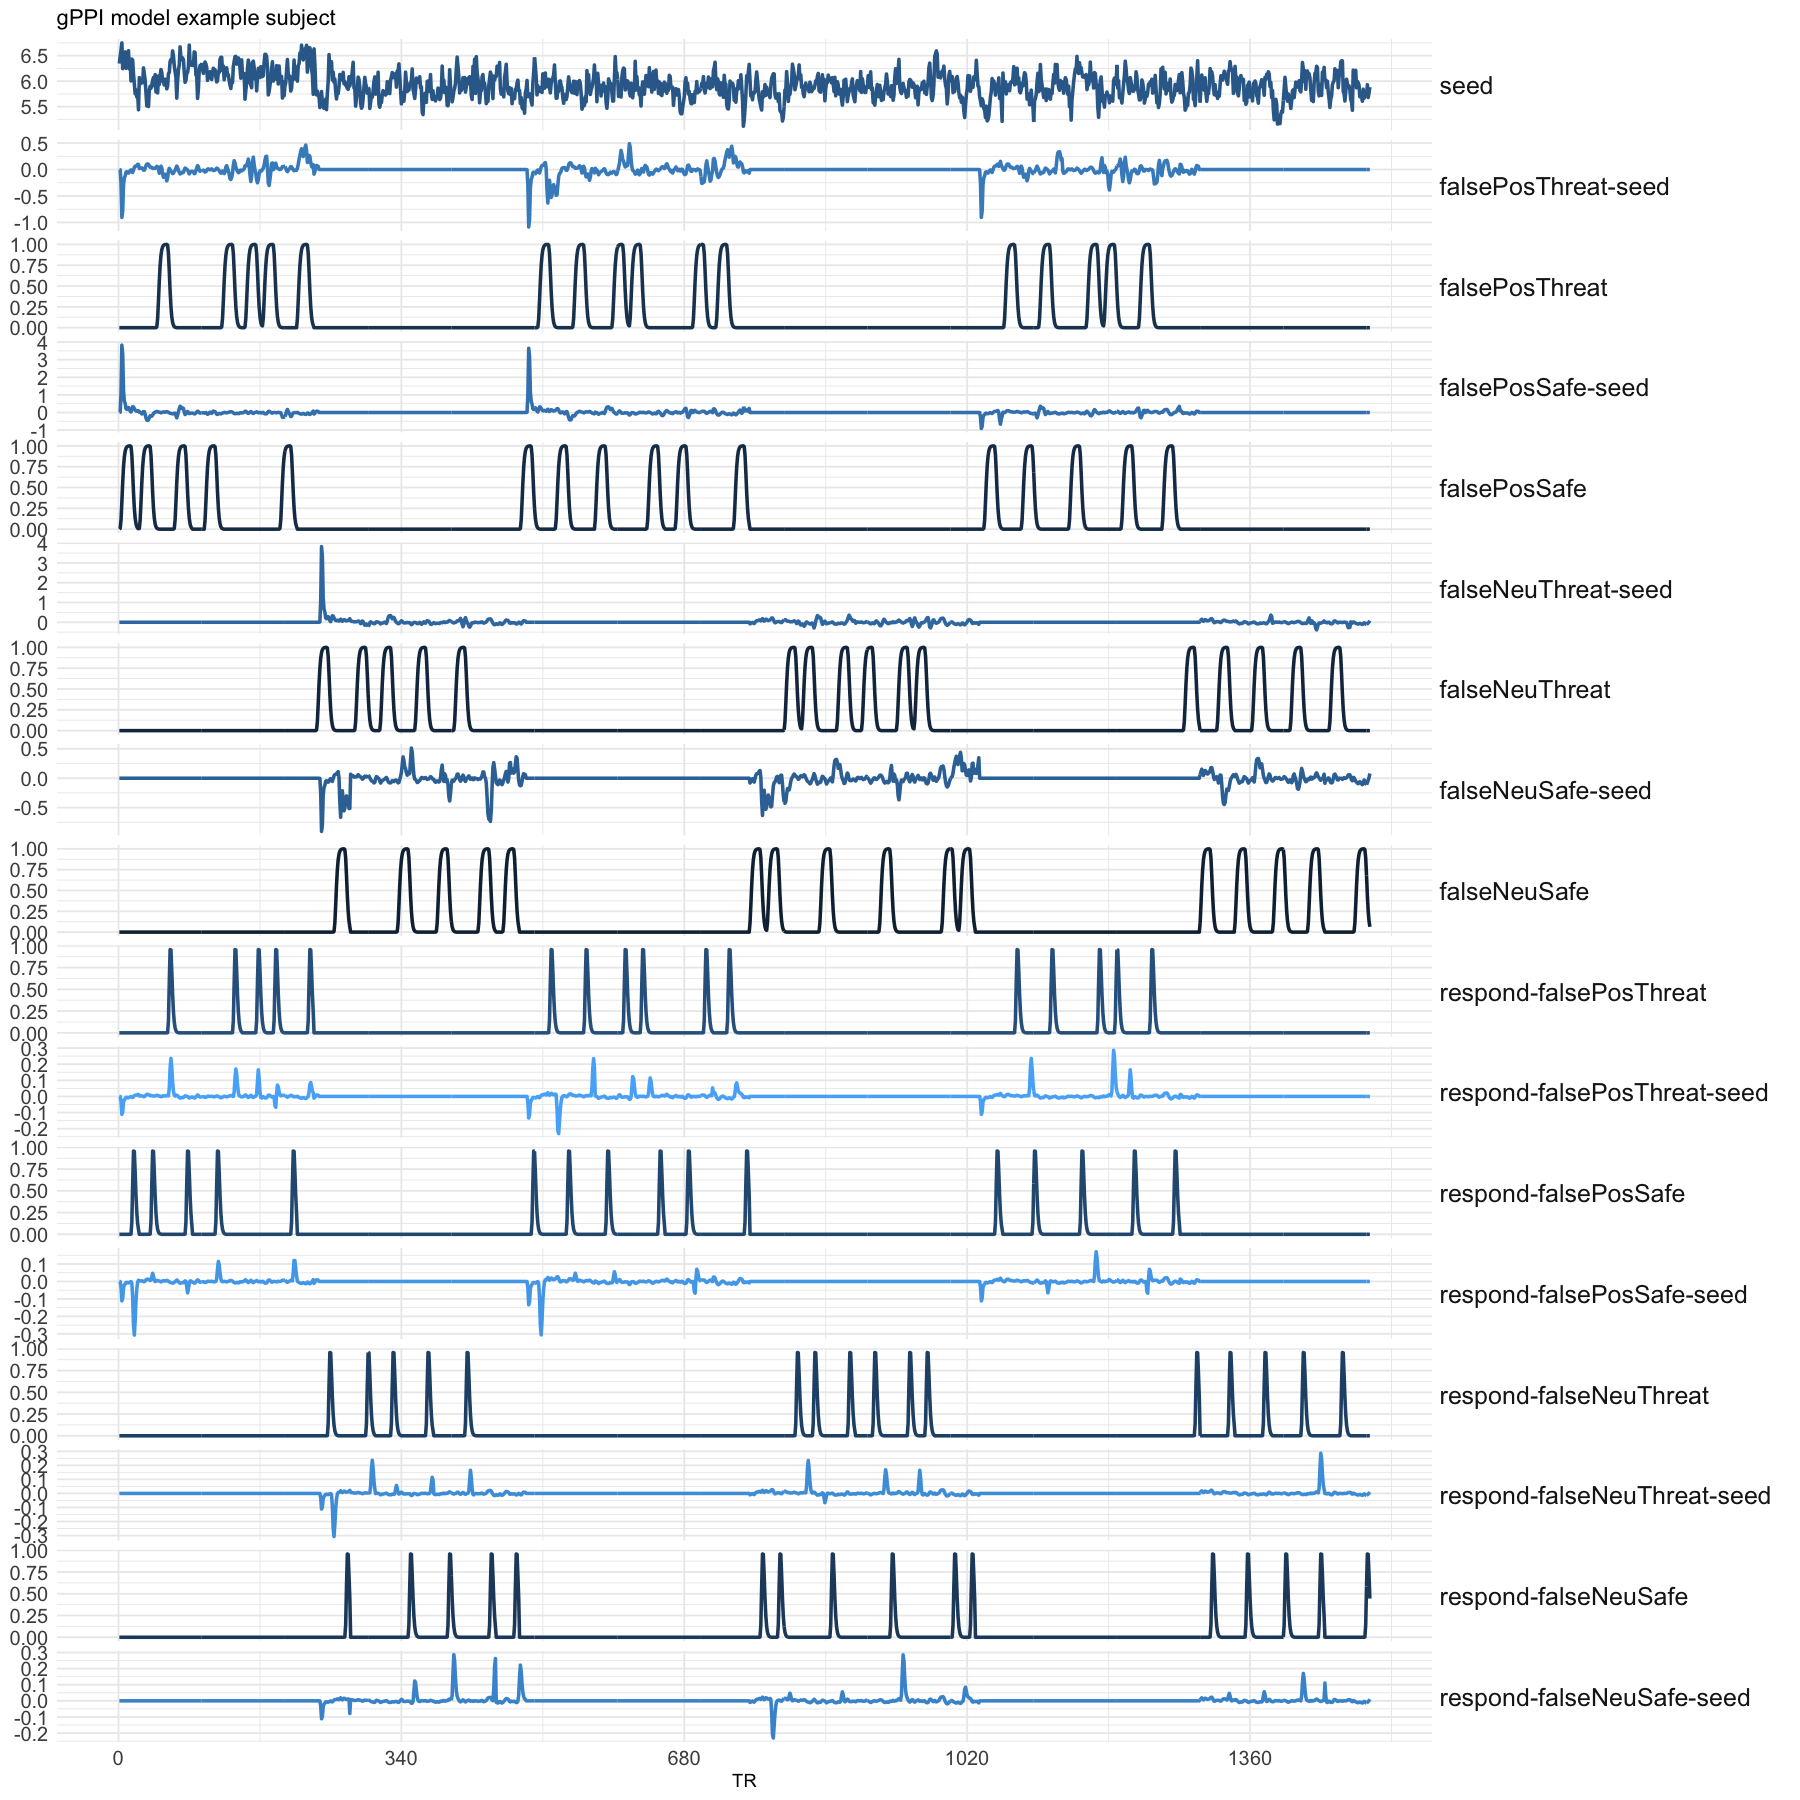

In [4]:
options(repr.plot.width = 15, repr.plot.height = 15)

plot <- ggplot(df.model, aes(x = TR, y = value)) + 
  geom_line(aes(color = index), size = 1) +
  facet_grid(rows = vars(key), scales = "free") +
  scale_x_continuous(breaks = c(0, 340, 680, 1020, 1360, 1700, 2040)) +
  scale_y_continuous() +
  theme_minimal() +
  labs(y = NULL) +
  theme(
        legend.position = 'none',
        strip.text.y = element_text(angle = 0, hjust = 0, size = 15),
        axis.text = element_text(size = 12)) 

plot + ggtitle(sprintf(
    "gPPI model example subject", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))


### First 500 TRs

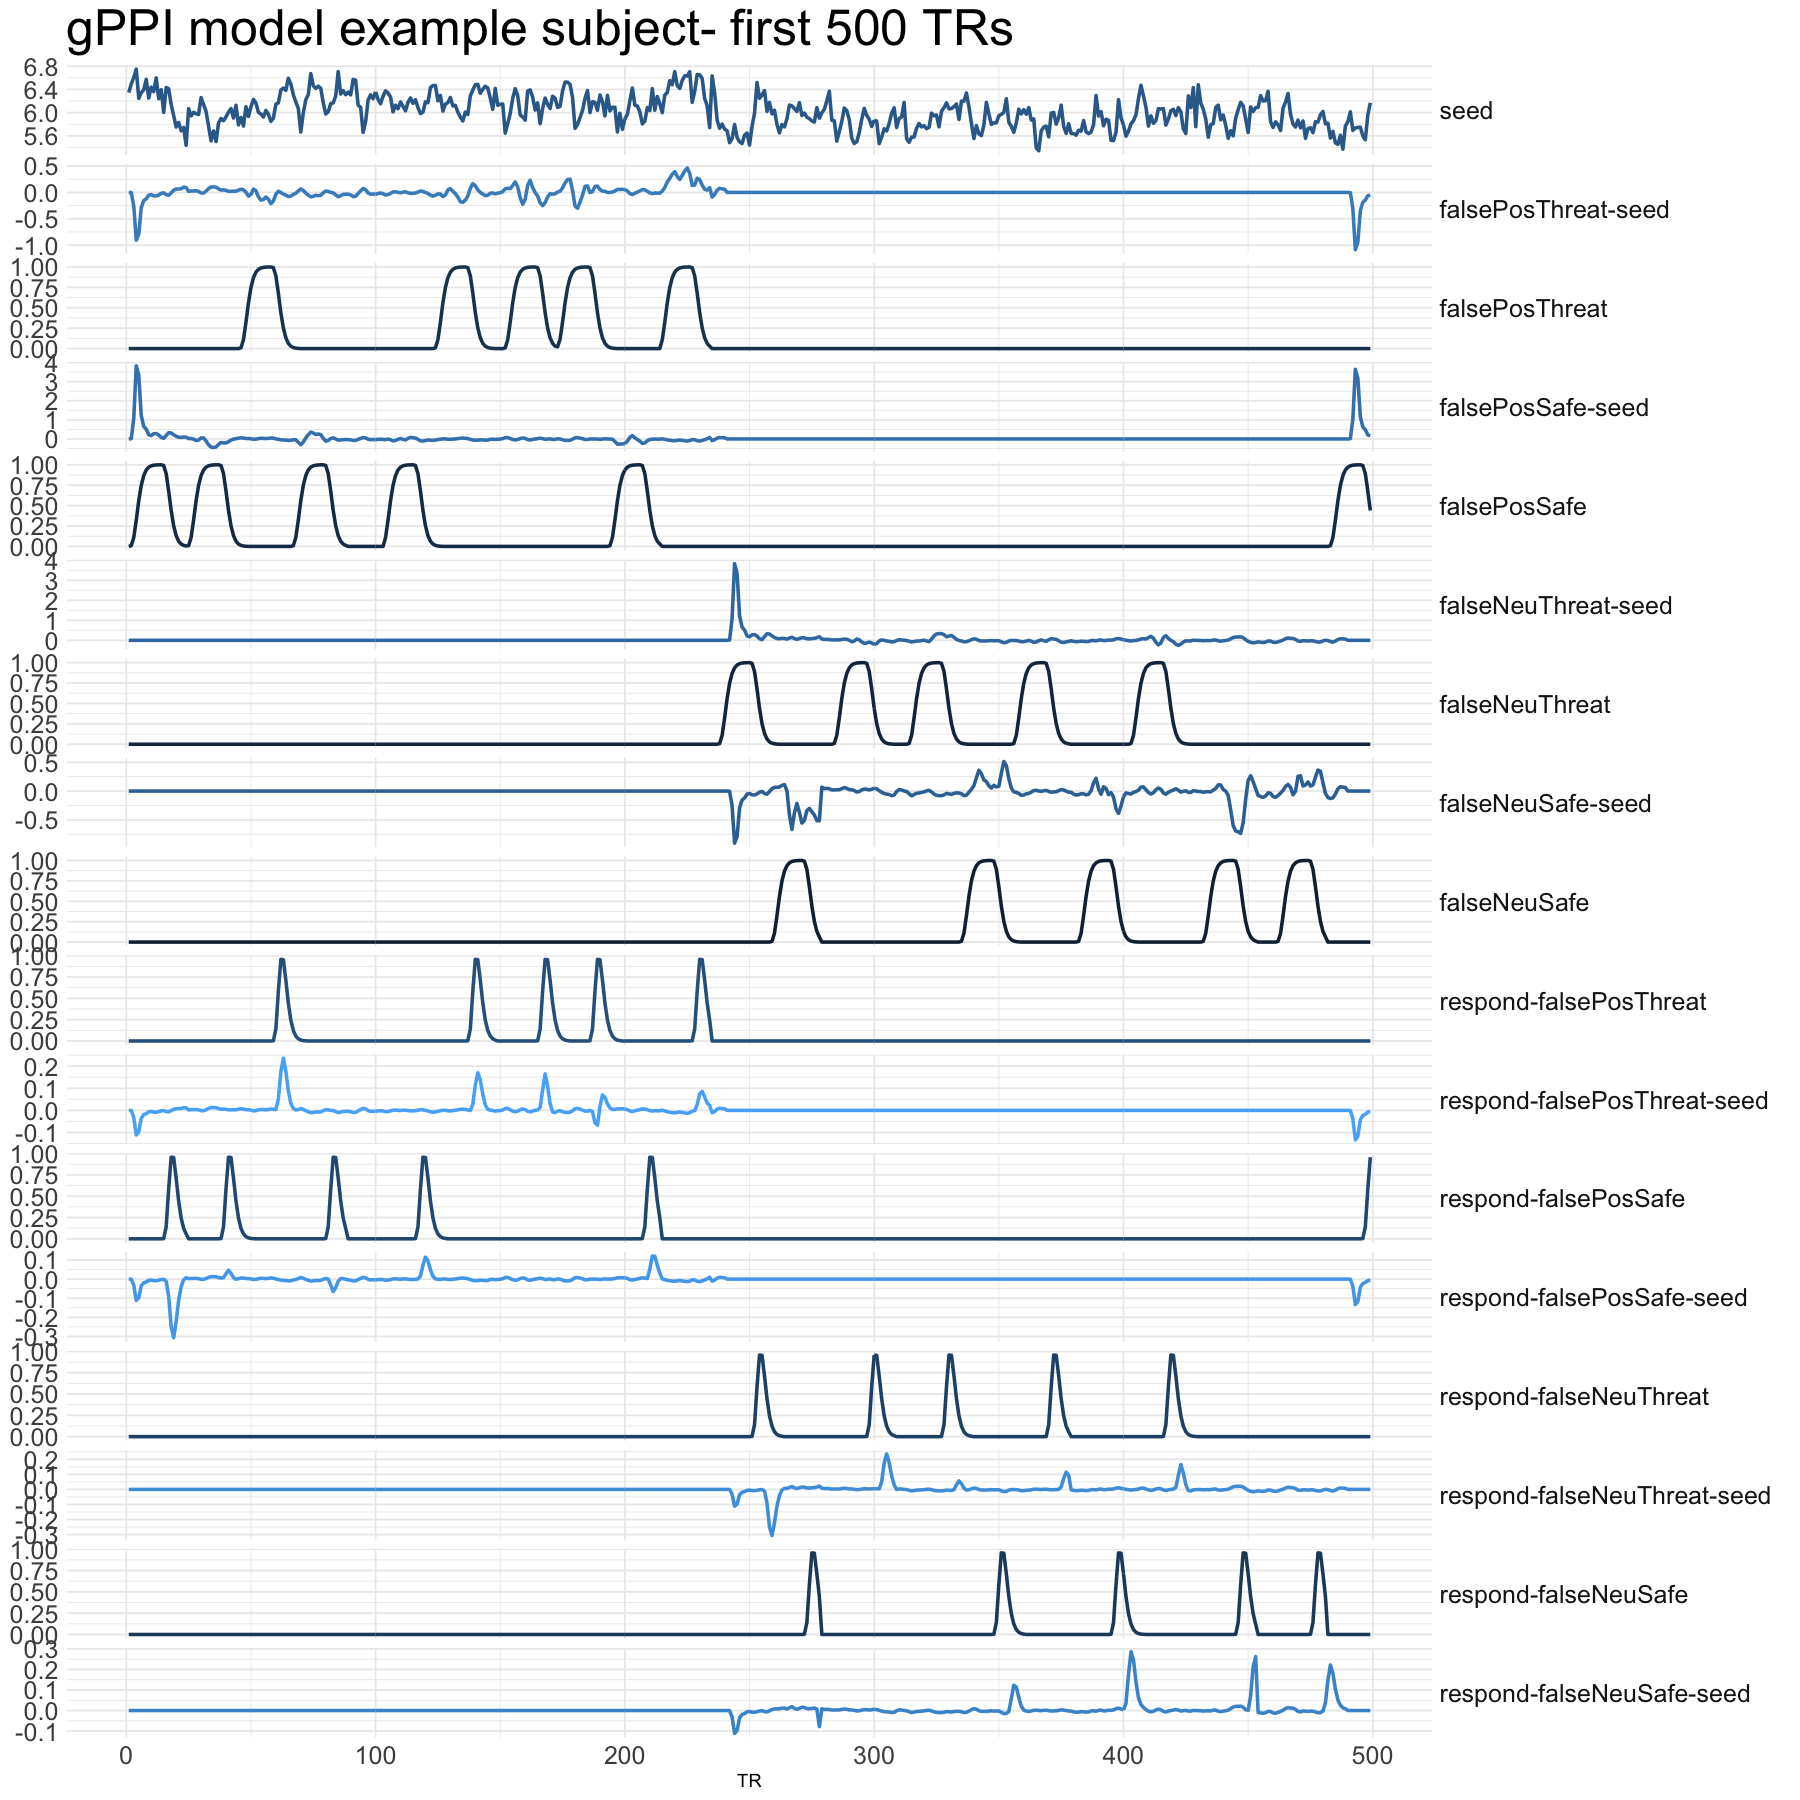

In [5]:
options(repr.plot.width = 15, repr.plot.height = 15)
plot <- df.model %>% filter(TR < 500) %>%
ggplot(aes(x = TR, y = value)) +
geom_line(aes(color = index), size = 1) +
facet_grid(rows = vars(key), scales = "free") +
  theme_minimal() +
  labs(y = NULL, title = "Regressors - first 500 TRs") +
  theme(
        plot.title = element_text(size = 30),
        legend.position = 'none',
        strip.text.y = element_text(angle = 0, hjust = 0, size = 15),
        axis.text = element_text(size = 15))
plot + ggtitle(sprintf(
    "gPPI model example subject- first 500 TRs ", 
    getOption("repr.plot.width"),
    getOption("repr.plot.height")
))

## Motion parameters & derivatives

Saving 7 x 7 in image



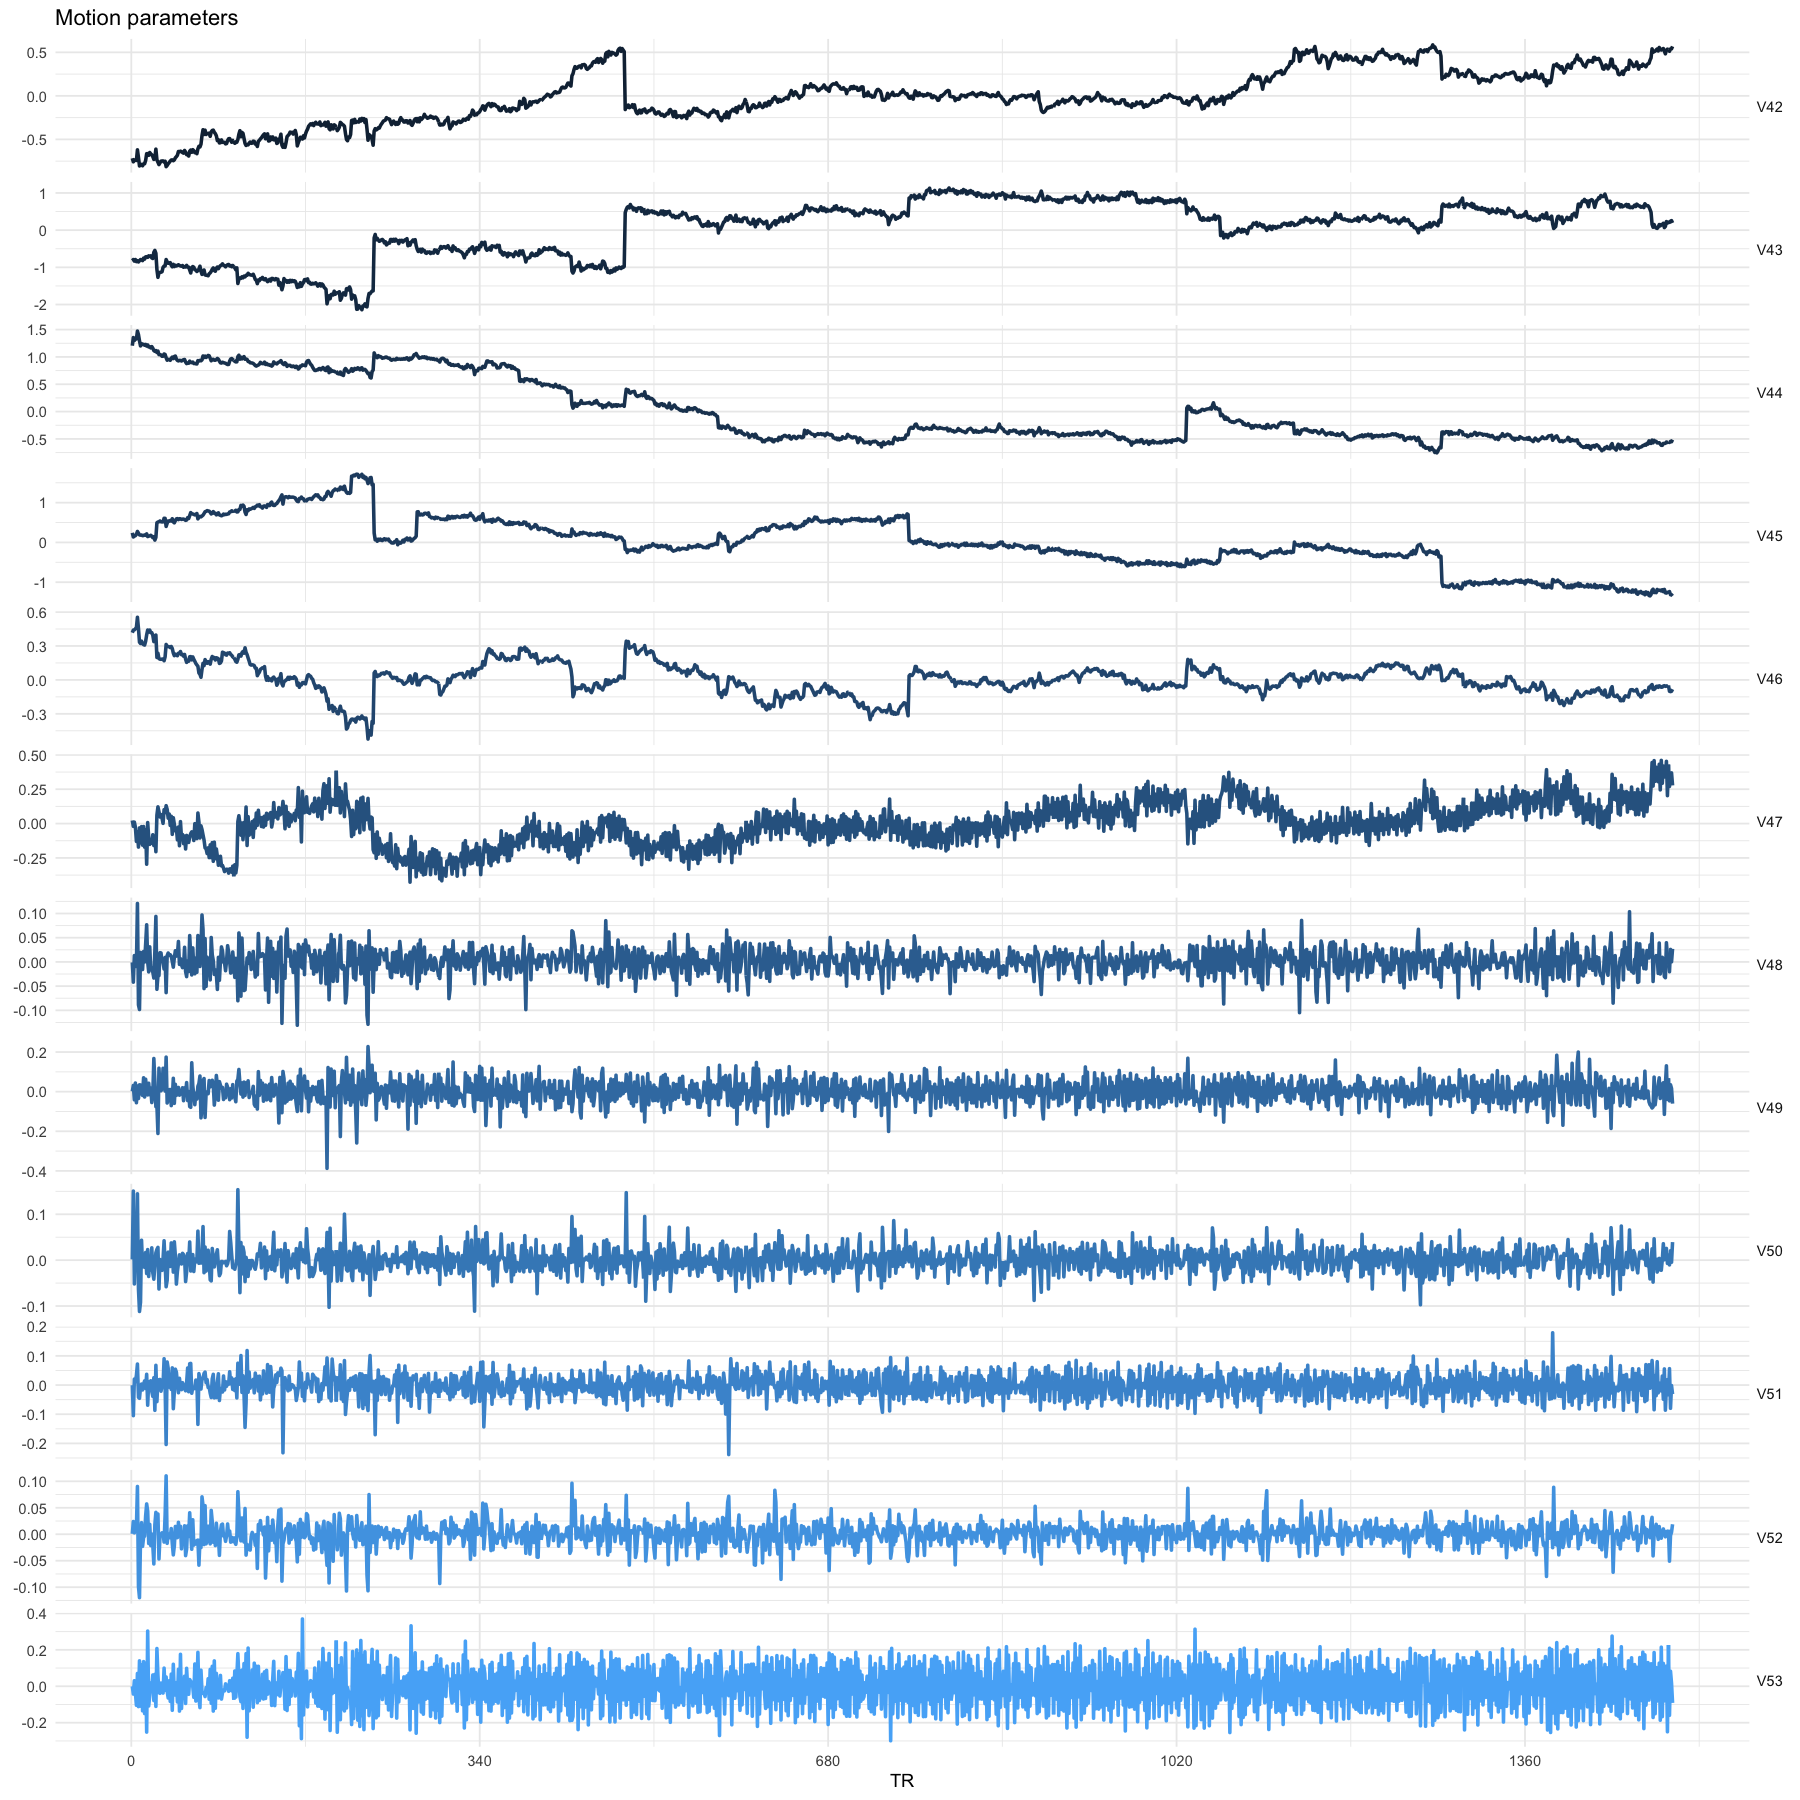

In [6]:
df.long %>% filter(index %in% 42:53) %>%
ggplot(aes(x = TR, y = value)) + 
  geom_line(aes(color = index), size = 1) +
  facet_grid(rows = vars(key), scales = "free") +
  scale_x_continuous(breaks = c(0, 340, 680, 1020, 1360, 1700, 2040)) +
  scale_y_continuous() +
  theme_minimal() +
  labs(y = NULL, title = "Motion parameters") +
  theme(
        legend.position = 'none',
        strip.text.y = element_text(angle = 0, hjust = 0))

ggsave('images/MAX_basicModel_motionParams.png')